In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data=pd.read_csv("laptop_price.csv",encoding = 'latin1')

In [3]:
data.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

In [4]:
data["Price_rupees"]=data["Price_euros"]*81.09

In [5]:
data.drop("Price_euros",axis=1,inplace=True)

In [6]:
data.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_rupees  
0   108635.4621  
1    72895.0446  
2    46626.7500  
3   205761.8205  
4   146253.9240

In [7]:
data.shape

(1303, 13)

In [8]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_rupees        0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_rupees      1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [10]:
data.drop("laptop_ID",axis=1,inplace=True)

In [11]:
data.head()

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight  Price_rupees  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   108635.4621  
1        Intel HD Graphics 6000  macOS  1.34kg    72895.0446  
2         Intel HD Graphics 620  No OS  1.86kg    46626.7500  
3            AMD Radeon Pro 455  macOS  1.83kg   205761.8205  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   146253.9240

# data visulization

### categorical data visulization

In [12]:
categorical=data.select_dtypes("O")

In [13]:
categorical.head()

Company      Product   TypeName                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook                            1440x900   
2      HP       250 G6   Notebook                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight  
0  Intel Iris Plus Graphics 640  macOS  1.37kg  
1        Intel HD Graphics 6000  macOS  1.34kg  
2         Intel HD Graphics 620  No OS  1.86kg  
3            AMD Radeon Pro 455  macOS  1.83kg  
4  Intel Iris Plus Graphics 650  macOS  1.37kg

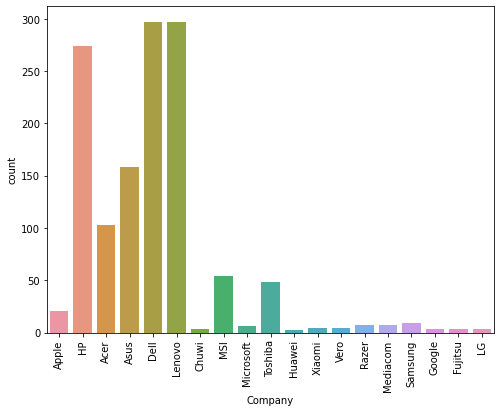

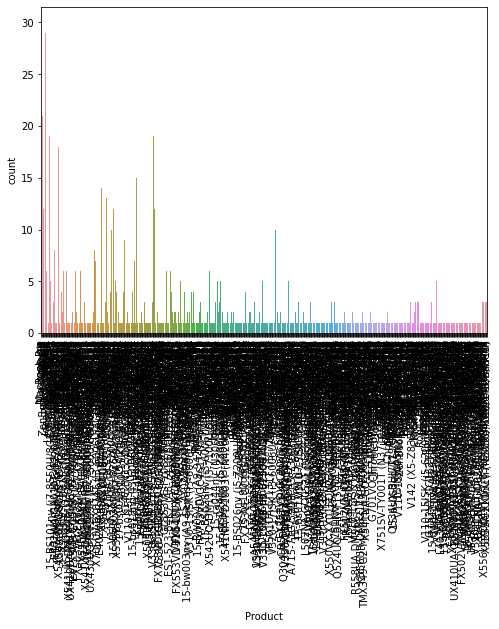

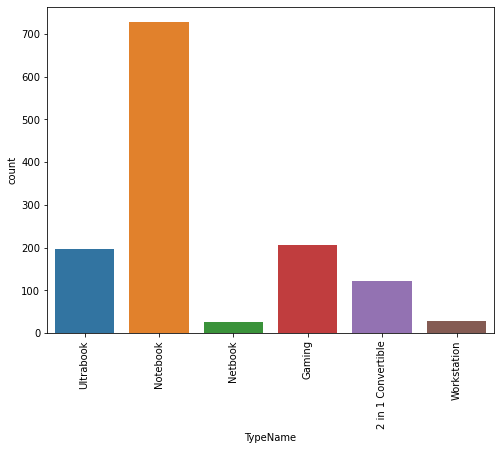

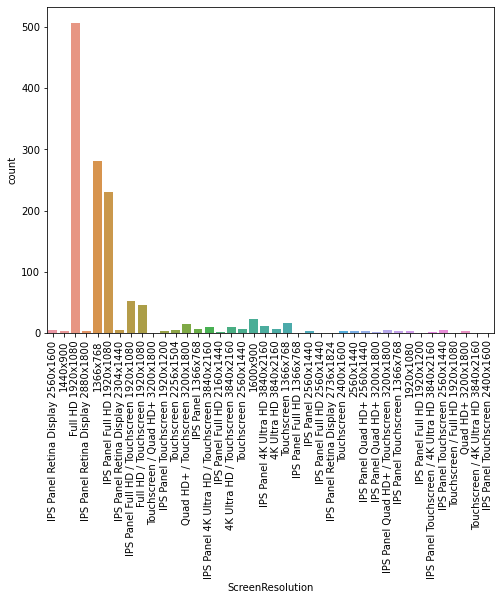

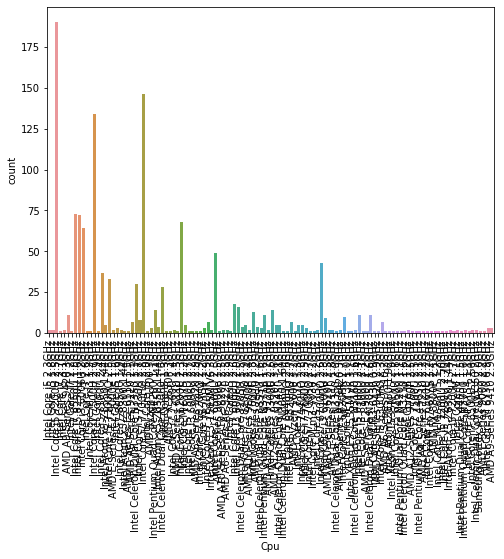

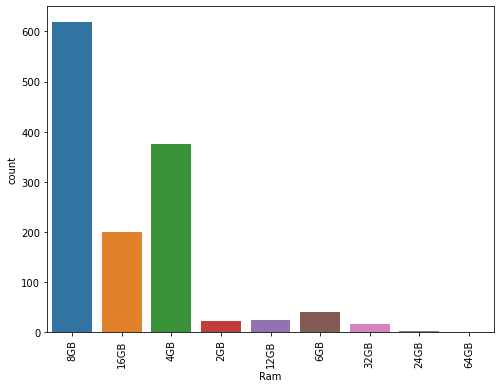

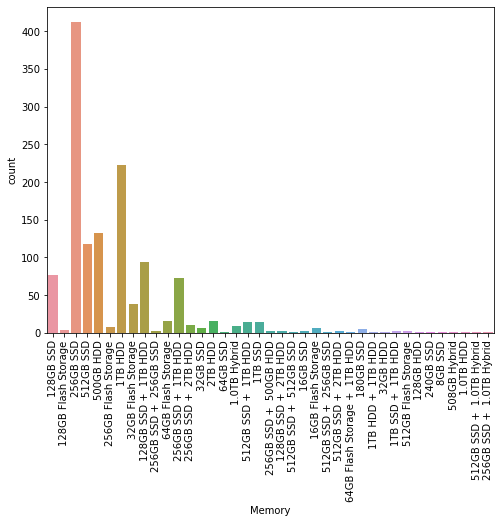

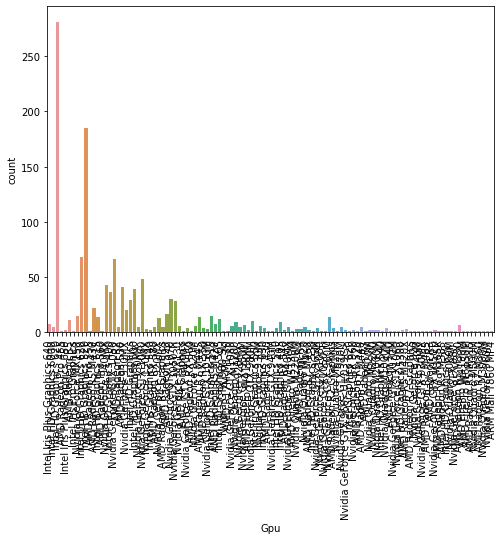

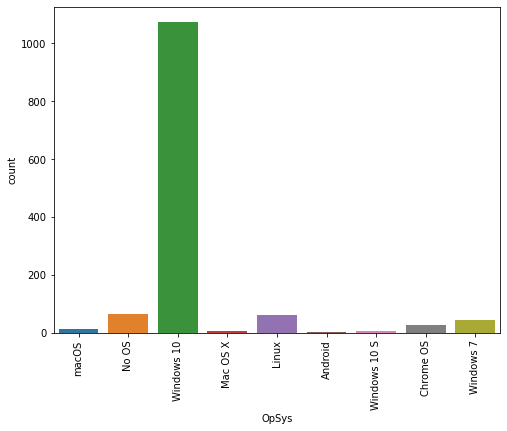

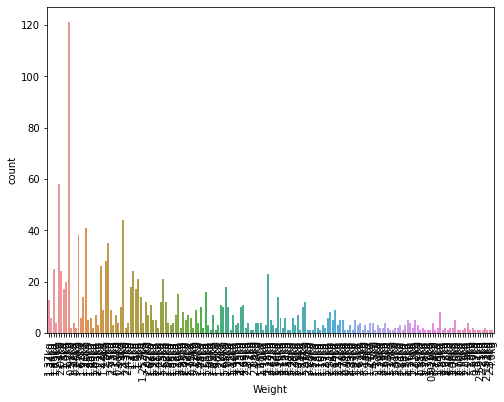

In [14]:
for i in categorical:
    plt.figure(figsize=(8,6));
    sns.countplot(x=i,data=categorical);
    plt.xticks(rotation=90);
    plt.show();

# numeric data analysis

In [15]:
numerical=data.select_dtypes("float")

In [16]:
numerical.columns

Index(['Inches', 'Price_rupees'], dtype='object')

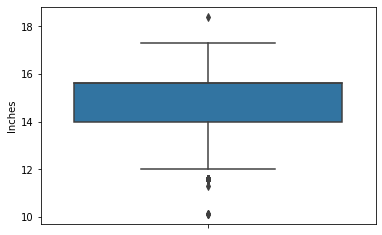

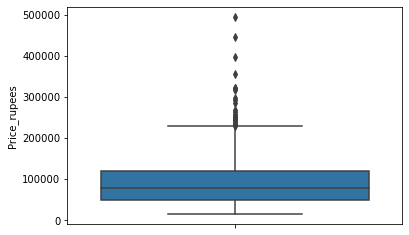

In [17]:
for i in numerical:
    sns.boxplot(y=i,data=numerical);
    plt.show();

# Biavariant Visuliazation

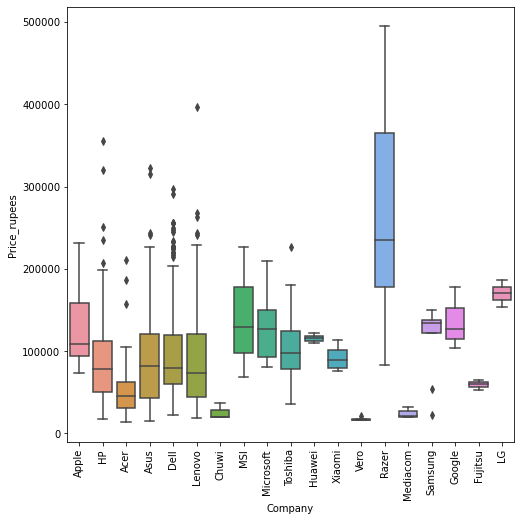

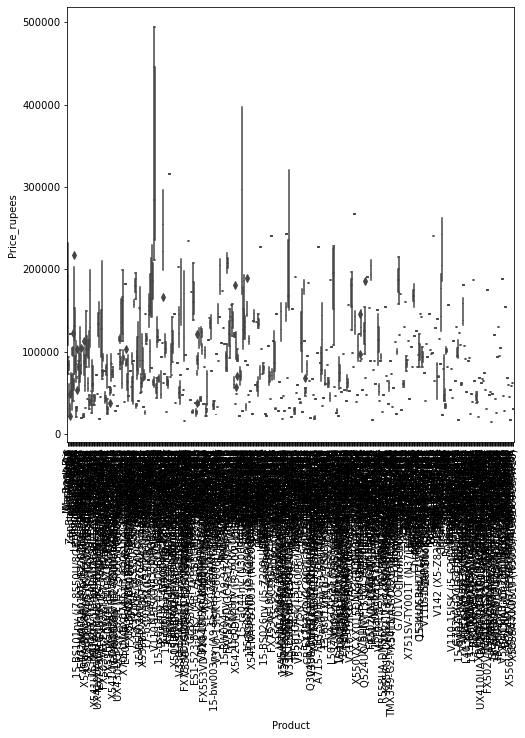

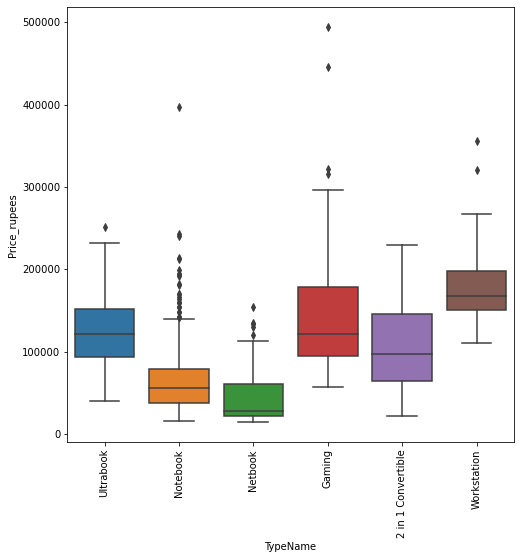

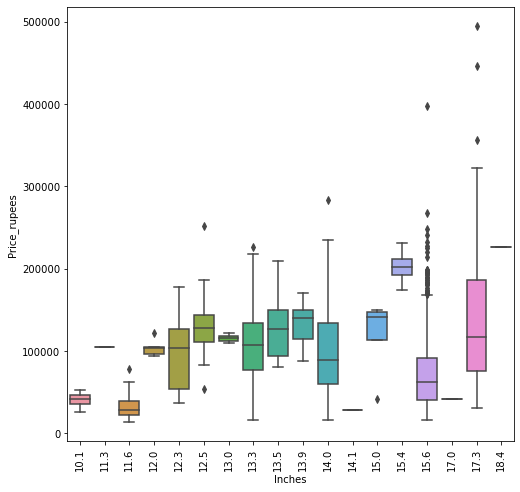

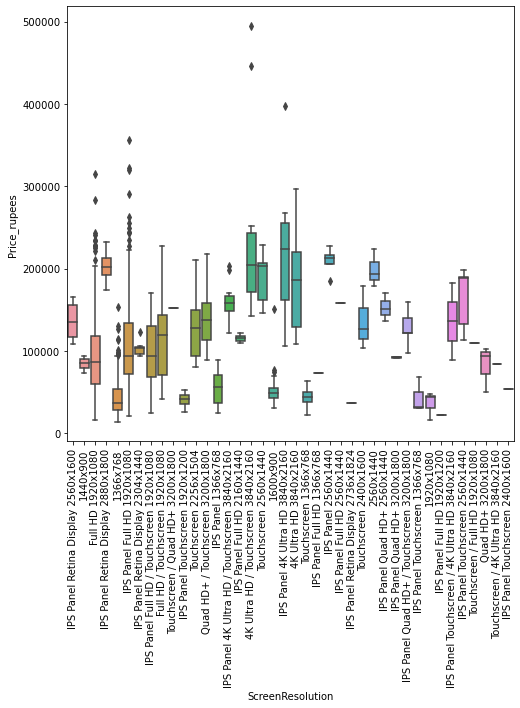

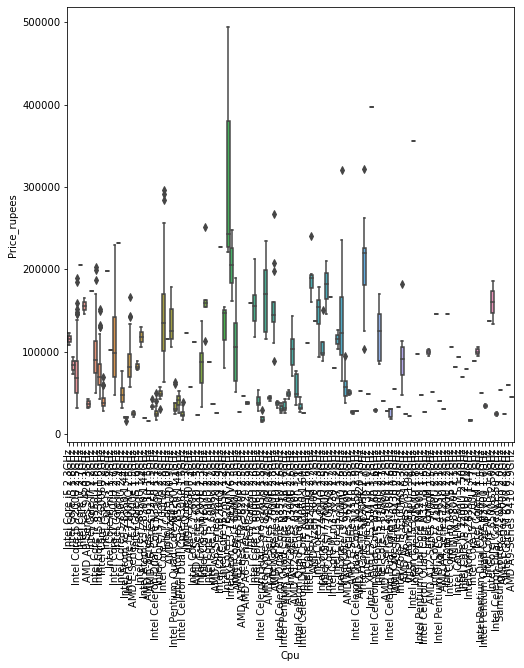

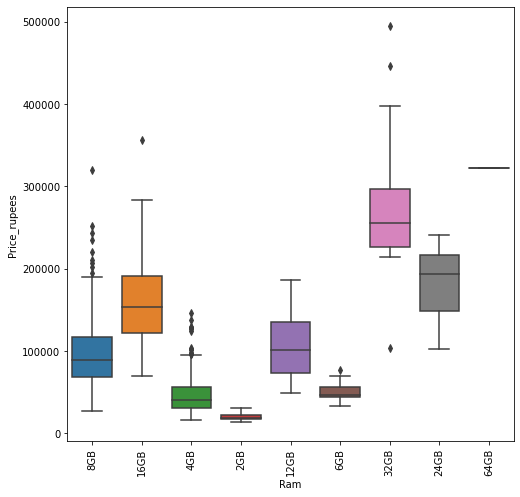

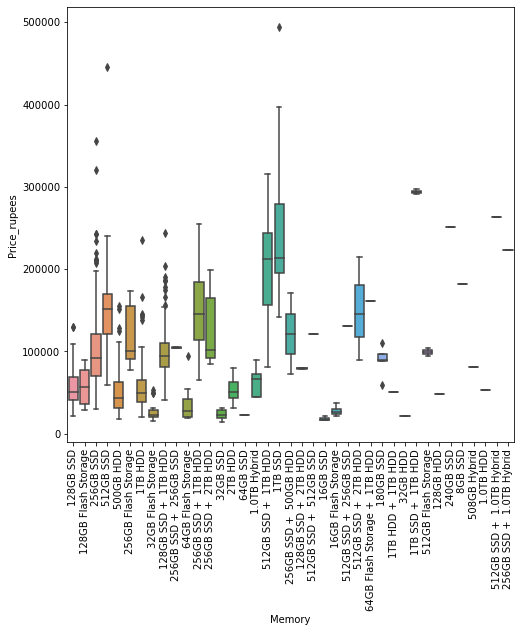

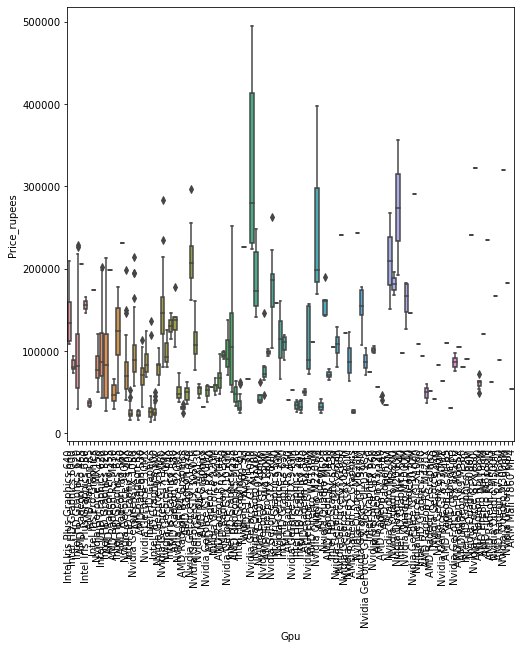

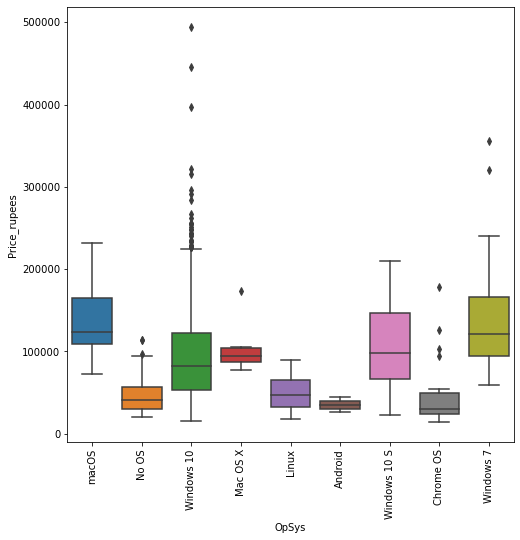

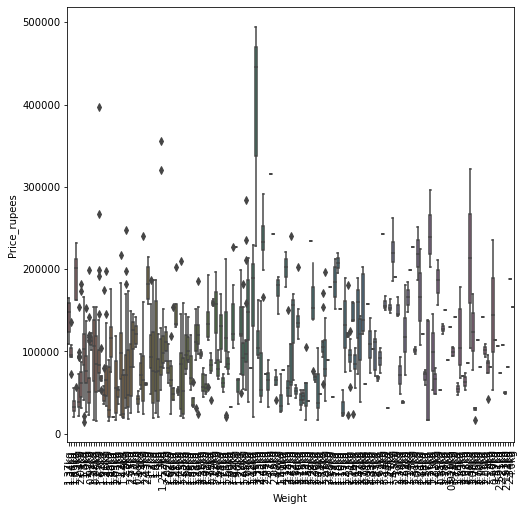

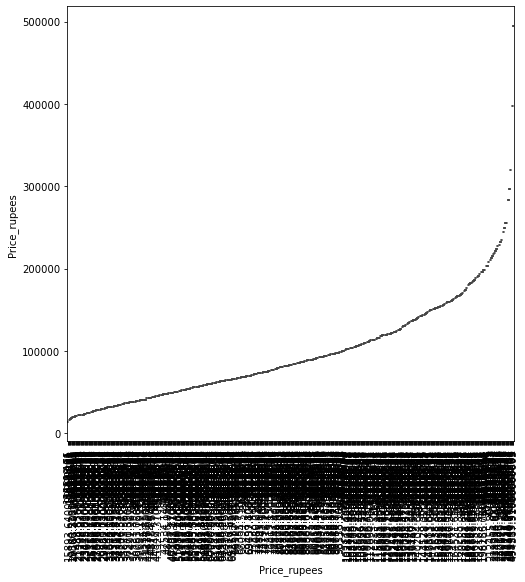

In [18]:
for i in data:
    plt.figure(figsize=(8,8));
    sns.boxplot(x=i,y="Price_rupees",data=data);
    plt.xticks(rotation=90)
    plt.show()
    


In [19]:
data["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [20]:
data["Product"].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [21]:
data["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [22]:
# data['TypeName'].replace ( ['Ultrabook','Notebook','Netbook','Gaming','2 in 1 Convertible','Workstation'],['6','5','3','4','2','1'],inplace=True)

In [23]:
data["ScreenResolution"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [24]:
data["ScreenResolution"]=data["ScreenResolution"].apply(lambda x:str(re.findall("\d+x\d+",str(x))[0]))

### convert this screenResolution in megapixels because here you got value in 2560x1600 and its string .

In [25]:
data["ScreenResolution"].replace(["2560x1600","1440x900","1920x1080","2880x1800","1366x768","2304x1440","3200x1800","1920x1200","2256x1504","3840x2160","2560x1440","2736x1824","2400x1600","1600x900"],[4.1,1.3,2.07,5.18,1.05,3.32,5.76,2.3,3.39,8.29,3.69,4.99,3.84,1.44],inplace=True)

In [26]:
data.head()

Company      Product   TypeName  Inches ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3              4.1   
1   Apple  Macbook Air  Ultrabook    13.3              1.3   
2      HP       250 G6   Notebook    15.6             2.07   
3   Apple  MacBook Pro  Ultrabook    15.4             5.18   
4   Apple  MacBook Pro  Ultrabook    13.3              4.1   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight  Price_rupees  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   108635.4621  
1        Intel HD Graphics 6000  macOS  1.34kg    72895.0446  
2         Intel HD Graphics 620  No OS  1.86kg    46626.7500  
3            AMD Radeon Pro 455  macOS  1.83kg   205761.8205  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   146253.9240

In [27]:
data["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [28]:
data["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [29]:
data["RAM"]=data["Ram"].apply(lambda x: int(re.findall("\d+",str(x))[0]))

In [30]:
data["RAM"].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

In [31]:
data["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [32]:
data["Gpu"].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [33]:
data["Gpu"].nunique()

110

In [34]:
data["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [35]:
data["Weight"].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [36]:
data["WEIGHT"]=data["Weight"].apply(lambda x: float(re.findall("[0-9]*\.?[0-9]+",str(x))[0]))

In [37]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_rupees', 'RAM',
       'WEIGHT'],
      dtype='object')

In [38]:
data.drop("Weight",axis=1,inplace=True)

In [39]:
data.head()

Company      Product   TypeName  Inches ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3              4.1   
1   Apple  Macbook Air  Ultrabook    13.3              1.3   
2      HP       250 G6   Notebook    15.6             2.07   
3   Apple  MacBook Pro  Ultrabook    15.4             5.18   
4   Apple  MacBook Pro  Ultrabook    13.3              4.1   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Price_rupees  RAM  WEIGHT  
0  Intel Iris Plus Graphics 640  macOS   108635.4621    8    1.37  
1        Intel HD Graphics 6000  macOS    72895.0446    8    1.34  
2         Intel HD Graphics 620  No OS    46626.7500    8    1.86  
3            AMD Radeon Pro 455  macOS   205761.8205   16    1.83  
4  Intel Iris Plus Graphics 650  macOS   146253.9240    8    1.37

In [40]:
data.drop(["Product","Cpu","Memory","Gpu"],axis=1,inplace=True)

In [41]:
data.head()

Company   TypeName  Inches ScreenResolution   Ram  OpSys  Price_rupees  RAM  \
0   Apple  Ultrabook    13.3              4.1   8GB  macOS   108635.4621    8   
1   Apple  Ultrabook    13.3              1.3   8GB  macOS    72895.0446    8   
2      HP   Notebook    15.6             2.07   8GB  No OS    46626.7500    8   
3   Apple  Ultrabook    15.4             5.18  16GB  macOS   205761.8205   16   
4   Apple  Ultrabook    13.3              4.1   8GB  macOS   146253.9240    8   

   WEIGHT  
0    1.37  
1    1.34  
2    1.86  
3    1.83  
4    1.37

In [42]:
data["ScreenResolution"].unique()

array([4.1, 1.3, 2.07, 5.18, 1.05, 3.32, 5.76, 2.3, 3.39, 8.29,
       '2160x1440', 3.69, 1.44, 4.99, 3.84], dtype=object)

In [43]:
data["ScreenResolution"].replace('2160x1440',3.11,inplace=True)

In [44]:
data.drop("Ram",axis=1,inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   float64
 4   OpSys             1303 non-null   object 
 5   Price_rupees      1303 non-null   float64
 6   RAM               1303 non-null   int64  
 7   WEIGHT            1303 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 81.6+ KB


In [46]:
data.head()

Company   TypeName  Inches  ScreenResolution  OpSys  Price_rupees  RAM  \
0   Apple  Ultrabook    13.3              4.10  macOS   108635.4621    8   
1   Apple  Ultrabook    13.3              1.30  macOS    72895.0446    8   
2      HP   Notebook    15.6              2.07  No OS    46626.7500    8   
3   Apple  Ultrabook    15.4              5.18  macOS   205761.8205   16   
4   Apple  Ultrabook    13.3              4.10  macOS   146253.9240    8   

   WEIGHT  
0    1.37  
1    1.34  
2    1.86  
3    1.83  
4    1.37

In [47]:
data=pd.get_dummies(data,drop_first=True)

In [48]:
data.columns

Index(['Inches', 'ScreenResolution', 'Price_rupees', 'RAM', 'WEIGHT',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_Chrome OS', 'OpSys_Linux',
       'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS'],
      dtype='object')

In [49]:
data.shape

(1303, 36)

In [50]:
data.head()

Inches  ScreenResolution  Price_rupees  RAM  WEIGHT  Company_Apple  \
0    13.3              4.10   108635.4621    8    1.37              1   
1    13.3              1.30    72895.0446    8    1.34              1   
2    15.6              2.07    46626.7500    8    1.86              0   
3    15.4              5.18   205761.8205   16    1.83              1   
4    13.3              4.10   146253.9240    8    1.37              1   

   Company_Asus  Company_Chuwi  Company_Dell  Company_Fujitsu  ...  \
0             0              0             0                0  ...   
1             0              0             0                0  ...   
2             0              0             0                0  ...   
3             0              0             0                0  ...   
4             0              0             0                0  ...   

   TypeName_Ultrabook  TypeName_Workstation  OpSys_Chrome OS  OpSys_Linux  \
0                   1                     0                0            0   
1                   1                     0                0            0   
2                   0                     0                0            0   
3                   1                     0                0            0   
4                   1                     0                0            0   

   OpSys_Mac OS X  OpSys_No OS  OpSys_Windows 10  OpSys_Windows 10 S  \
0               0            0                 0                   0   
1               0            0                 0                   0   
2               0            1                 0                   0   
3               0            0                 0                   0   
4               0            0                 0                   0   

   OpSys_Windows 7  OpSys_macOS  
0                0            1  
1                0            1  
2                0            0  
3                0            1  
4                0            1  

[5 rows x 36 columns]

In [51]:
x=data.drop(columns=["Price_rupees"],axis=1)
y=data["Price_rupees"]

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [54]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [55]:
x_train_scaled.shape

(1042, 35)

In [56]:
y_train.shape

(1042,)

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [58]:
model=LinearRegression()

In [59]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [60]:
y_pred=model.predict(x_test_scaled)

In [61]:
print(r2_score(y_test,y_pred))

0.7853335518030321


In [62]:
print(mean_squared_error(y_test,y_pred))

694151555.4100538


# Decission Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
import optuna

In [64]:
model=DecisionTreeRegressor(max_depth=19,random_state=1,criterion='poisson',splitter='best')
model.fit(x_train_scaled,y_train)
cross=cross_val_score(model,x_train_scaled,y_train,cv=10)

In [65]:
train_pred=model.predict(x_train_scaled)
test_pred=model.predict(x_test_scaled)
rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
r2_train = r2_score(y_train,train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test,test_pred))
r2_test= r2_score(y_test,test_pred)
print('Train Performance')
print(f'RMSE : {rmse_train}')
print(f'R2 : {r2_train}')
print('Test Performance')
print(f'RMSE : {rmse_test}')
print(f'R2 : {r2_test}')

Train Performance
RMSE : 8931.981917863166
R2 : 0.9750631259959585
Test Performance
RMSE : 28256.32562538801
R2 : 0.7530885425644285


In [66]:
# train_pred=model.predict(x_train_scaled)

In [67]:
# print(r2_score(y_train,train_pred))

In [68]:
# y_pre=model.predict(x_test_scaled)

In [69]:
# print(r2_score(y_test,y_pre))

In [70]:
# print(cross.mean())

In [71]:
# print(mean_squared_error(y_test,y_pre))

In [72]:
# 1. Define an objective function to be maximized.
def objective(trial):
  max_depth = trial.suggest_int('max_depth',2,30)
  critieria = trial.suggest_categorical('criterion',['squared_error', 'friedman_mse', 'absolute_error', 'poisson'])
  splitter = trial.suggest_categorical('splitter',['best','random'])
  model = DecisionTreeRegressor(criterion=critieria,max_depth=max_depth,splitter=splitter)
  cv_score = np.mean(cross_val_score(model,x_train_scaled,y_train,scoring = 'neg_mean_squared_error',cv=5))
  return cv_score
# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

[I 2022-09-12 18:25:21,023] A new study created in memory with name: no-name-c181afeb-f9cc-4ce9-83a4-7a5a7b7acec4
[I 2022-09-12 18:25:21,065] Trial 0 finished with value: -1102241572.9097915 and parameters: {'max_depth': 19, 'criterion': 'poisson', 'splitter': 'random'}. Best is trial 0 with value: -1102241572.9097915.
[I 2022-09-12 18:25:21,104] Trial 1 finished with value: -1029167041.265773 and parameters: {'max_depth': 20, 'criterion': 'friedman_mse', 'splitter': 'best'}. Best is trial 1 with value: -1029167041.265773.
[I 2022-09-12 18:25:21,533] Trial 2 finished with value: -1131694640.7758858 and parameters: {'max_depth': 12, 'criterion': 'absolute_error', 'splitter': 'best'}. Best is trial 1 with value: -1029167041.265773.


In [73]:
study.best_params

{'max_depth': 20, 'criterion': 'friedman_mse', 'splitter': 'best'}

In [75]:
 
# print("Best hyperparameters: {}".format(trial.params))

In [78]:
dt=DecisionTreeRegressor(max_depth=20,criterion='friedman_mse',splitter='best')

In [79]:
dt.fit(x_train_scaled,y_train)
dt_train_predt=dt.predict(x_train_scaled)
dt_test_pred=dt.predict(x_test_scaled)

In [80]:
train_pred=dt.predict(x_train_scaled)
test_pred=dt.predict(x_test_scaled)
rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
r2_train = r2_score(y_train,train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test,test_pred))
r2_test= r2_score(y_test,test_pred)
print('Train Performance')
print(f'RMSE : {rmse_train}')
print(f'R2 : {r2_train}')
print('Test Performance')
print(f'RMSE : {rmse_test}')
print(f'R2 : {r2_test}')

Train Performance
RMSE : 8972.819156995756
R2 : 0.9748345807382808
Test Performance
RMSE : 26403.01332390162
R2 : 0.7844158344069024


# Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rd=RandomForestRegressor()

In [90]:
rd.fit(x_train_scaled,y_train)
dt_train_predt=rd.predict(x_train_scaled)
dt_test_pred=rd.predict(x_test_scaled)

In [92]:
rmse_train = np.sqrt(mean_squared_error(y_train,dt_train_predt))
r2_train = r2_score(y_train,dt_train_predt)
rmse_test = np.sqrt(mean_squared_error(y_test,dt_test_pred))
r2_test= r2_score(y_test,dt_test_pred)
print('Train Performance')
print(f'RMSE : {rmse_train}')
print(f'R2 : {r2_train}')
print('Test Performance')
print(f'RMSE : {rmse_test}')
print(f'R2 : {r2_test}')

Train Performance
RMSE : 12519.935781665386
R2 : 0.951005137512003
Test Performance
RMSE : 22632.223969041213
R2 : 0.8415966602170769
